In [2]:
# 라이브러리 임포트
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt

In [3]:
np.random.gumbel(0.0, 1.0, 5)

array([-0.37373326,  1.8769166 ,  4.69638634, -0.3009419 ,  0.39659492])

In [4]:
def p(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

In [5]:
s = 0.5

def q(x, m):
    return 1/s * np.exp(-(x-m)/s) * np.exp(-np.exp(-(x-m)/s))

In [6]:
x1 = 5

def func(N):
    x_list = [x1] # accept 된 x가 담길 리스트
    x_current = x1 # x_1 = 5

    for _ in range(N):
        x_star = np.random.gumbel(x_current, s) # x*를 gumbel(xi, s=0.5)에서 무작위로 선택
        a = p(x_star)*q(x_current, x_star)/p(x_current)/q(x_star, x_current) # acceptance 확률을 구하기 위한 변수
        acceptance_prob = min(1, a) # acceptance 확률 = min[1, {p(x*)p(x|x*)}/{p(x)/p(x*|x)}]
        if acceptance_prob == 1: # min값이 1일 때
            x_current = x_star # x*가 x값으로 accept 됨
        elif np.random.uniform(0,1) < acceptance_prob: # min값이 a이고 a가 r~U(0,1)보다 클 때
            x_current = x_star # x*가 x값으로 accept 됨
        elif np.random.uniform(0,1) >= acceptance_prob: # min값이 a이고 a가 r~U(0,1)보다 작거나 같을 때
            x_current = x_current # x*는 reject 되고 x는 이전 x를 그대로 accept
        x_list.append(x_current) # accpet 된 x를 x_list에 담음

    return x_list # N번 반복 후 리스트 반환

(array([  1.,   3.,   4.,   2.,  17.,  17.,  19.,  19.,  47.,  79., 101.,
        156., 188., 255., 250., 356., 431., 398., 549., 646., 656., 686.,
        720., 672., 626., 577., 550., 467., 365., 352., 236., 182., 123.,
         73.,  48.,  26.,  40.,   9.,  13.,  14.,   1.,   2.,   8.,   4.,
          0.,   3.,   0.,   2.,   5.,   3.]),
 array([-3.63759753, -3.46484558, -3.29209363, -3.11934168, -2.94658973,
        -2.77383778, -2.60108582, -2.42833387, -2.25558192, -2.08282997,
        -1.91007802, -1.73732607, -1.56457412, -1.39182217, -1.21907022,
        -1.04631827, -0.87356632, -0.70081437, -0.52806242, -0.35531047,
        -0.18255852, -0.00980657,  0.16294538,  0.33569733,  0.50844929,
         0.68120124,  0.85395319,  1.02670514,  1.19945709,  1.37220904,
         1.54496099,  1.71771294,  1.89046489,  2.06321684,  2.23596879,
         2.40872074,  2.58147269,  2.75422464,  2.92697659,  3.09972854,
         3.27248049,  3.44523244,  3.6179844 ,  3.79073635,  3.9634883 ,
 

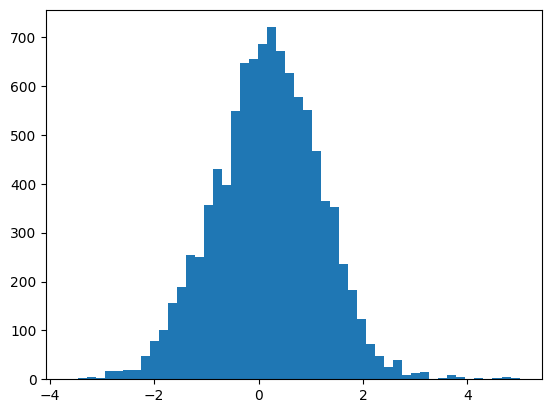

In [7]:
plt.hist(func(10000), bins=50)